**Extract video fragment (Ноутбук для извлечения видео-фрагмента из видео)**

https://drive.google.com/file/d/16aHJwyneroUG0qvJSBSh9cc9qTnrD_cX

## **Сервисные функции**

In [ ]:
import os
import shutil

# @title Функция удаления всех папок и файлов в directory
def delete_all_files_and_folders(directory):
    try:
        # Переход в указанную директорию
        os.chdir(directory)

        # Удаление всех файлов и папок
        for file in os.listdir():
            file_path = os.path.join(directory, file)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print(f"Failed to delete {file_path}. Reason: {e}")

        print(f"All files and folders in {directory} have been deleted.")
    except Exception as e:
        print(f"Failed to delete files and folders. Reason: {e}")


## **Предварительные действия**

In [ ]:
!nvidia-smi


Tue Dec 26 17:18:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              15W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# @title Удаление всех папок и файлов в root_path
delete_all_files_and_folders(HOME)


All files and folders in /content have been deleted.


## **Установка YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display
import shutil
import os


## **Обнаружение объектов и сегментация**

In [ ]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title Определение путей для использования лучшей модели best.pt с Google Disk
# Базовый путь, где хранится модель
base_path = '/content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/'

last_best_path = f"{base_path}Last_Best/"
test_predict_path = f"{base_path}Test_Predict/"
output_path = f"{base_path}Output_Predict/"

print(f'Путь, где сохранена модель: {last_best_path}')

# Минимальная вероятность обнаружения
min_conf = 0.5


Путь, где сохранена модель: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Last_Best/


In [ ]:
# @title Параметры по умолчанию (сегментация с рамками, названиями классов и вероятностью их обнаружения)

!yolo task=segment mode=predict model={last_best_path}best.pt source='{test_predict_path}' conf={min_conf} save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_19s_original.png: 384x640 1 building-site, 4 buildings-childrens, 12 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 15 lawns, 1 pits-with-water, 9 roadss, 437.2ms
image 2/8 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_29s_original.png: 384x640 1 building-site, 2 buildings-childrens, 3 buildings-residentials, 2 grounds-plays, 1 grounds-sports, 9 lawns, 1 pits-with-water, 6 roadss, 30.8ms
image 3/8 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_39s_original.png: 384x640 1 building-site, 2 buildings-childrens, 4 buildings-residentials, 1 grounds-play, 1 grounds-sports, 6 lawns, 1 pits-

In [ ]:
# @title Вывод на экран результата сегментации городских объектов с параметрами по умолчанию

# Получение списка файлов и сортировка по имени
image_paths = sorted(glob.glob(f'{HOME}/runs/segment/predict/*.png'))

# Обработка файлов в порядке имён
for image_path in image_paths:
    display(Image(filename=image_path, width=1500))
    print("\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Исходный путь
source_folder = f'{HOME}/runs/segment/predict/'
output_path_1 = f"{output_path}predict1/"
print(f'output_path: {output_path_1}')

# @title Копирование папки predict в папку output_path_1

# Создаем целевую директорию, если она еще не существует
os.makedirs(output_path_1, exist_ok=True)

# Копирование файлов из source_folder в output_path_1
for file_name in os.listdir(source_folder):
    source_file = os.path.join(source_folder, file_name)
    destination_file = os.path.join(output_path_1, file_name)
    shutil.copy2(source_file, destination_file)


output_path: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Output_Predict/


In [ ]:
# @title Только сегментация. Параметр boxes=False

!yolo task=segment mode=predict model={last_best_path}best.pt source='{test_predict_path}' conf={min_conf} save=True boxes=False


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_19s_original.png: 384x640 1 building-site, 4 buildings-childrens, 12 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 15 lawns, 1 pits-with-water, 9 roadss, 96.3ms
image 2/8 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_29s_original.png: 384x640 1 building-site, 2 buildings-childrens, 3 buildings-residentials, 2 grounds-plays, 1 grounds-sports, 9 lawns, 1 pits-with-water, 6 roadss, 30.9ms
image 3/8 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_39s_original.png: 384x640 1 building-site, 2 buildings-childrens, 4 buildings-residentials, 1 grounds-play, 1 grounds-sports, 6 lawns, 1 pits-w

In [ ]:
# @title Вывод на экран результата сегментации городских объектов БЕЗ РАМОК

# Получение списка файлов и сортировка по имени
image_paths = sorted(glob.glob(f'{HOME}/runs/segment/predict2/*.png'))

# Обработка файлов в порядке имён
for image_path in image_paths:
    display(Image(filename=image_path, width=1500))
    print("\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Исходный путь
source_folder = f'{HOME}/runs/segment/predict2/'
output_path_2 = f"{output_path}predict2/"
print(f'output_path: {output_path_2}')

# @title Копирование папки predict2 в папку output_path_2

# Создаем целевую директорию, если она еще не существует
os.makedirs(output_path_2, exist_ok=True)

# Копирование файлов из source_folder в output_path_2
for file_name in os.listdir(source_folder):
    source_file = os.path.join(source_folder, file_name)
    destination_file = os.path.join(output_path_2, file_name)
    shutil.copy2(source_file, destination_file)


output_path: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Output_Predict/predict2/


## **Вывод:**

**Качество обнаружения и сегментации городских объектов на видео вполне удовлетворительно для первого раза 🌝**

**P.S.:**

Из-за того, что размеченная база не очень большая, т.е. всего 314 изображений, и классы не сбалансированы, наблюдается, что некоторые классы распознаются не стабильно. Если же в классе достаточно размеченных объектов для обучения, то классы распознаются более стабильно.

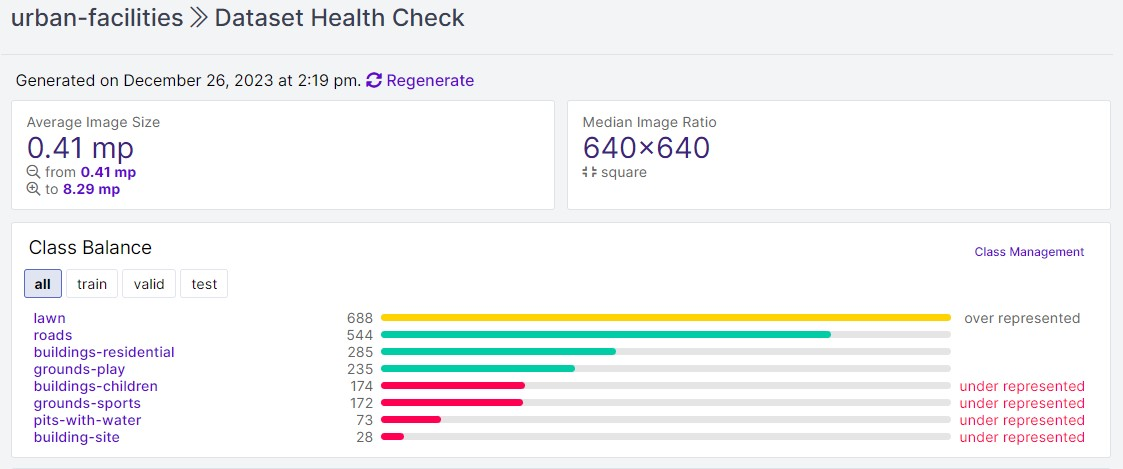

## **Ссылки на Results от YOLOv8**

### ***С рамками, названиями классов и уверенностью***

Для сегментации объектов был выбран видео фрагмент в файле DJI_0002 (1).MP4:

https://drive.google.com/uc?id=1Kk5fx8C4nCe9Drxl-wTMP5MfjU4H1F0F

интервалом с 1 мин. 19 сек по 2 мин. 19 сек. (длительность 1 мин. 00 сек.)


video_fragment.avi после YOLOv8 segment (792 Мб 3840х2160 битрейт 1443225 кбит/сек)

https://drive.google.com/file/d/1tHDNV8ev9nmKs2eN0XApniRThsILd5PK

[FREE - HDconvert.com] video_fragment_predicted.mp4 (40.1 Мб битрейт 4376 кбит/сек)

https://drive.google.com/file/d/1ds_bfaILzhXXjgVwDeG3pmqyA1QRURhK

Городские объекты (Images).zip

**7 изображений** 3840х2160 с обнаруженными классами объектов

https://drive.google.com/file/d/1N2LbeMZgO4CFySA4Rtt9_9pznFcK6_5Z

### ***Только сегментация***

video_fragment.avi после YOLOv8 segment (792 Мб 3840х2160 битрейт 1443225 кбит/сек)

https://drive.google.com/file/d/1-46lwzuzCXhsoOYFuWfoLmlTWWmKr86c

[FREE - HDconvert.com] video_fragment_predicted.mp4 (30.9 Мб битрейт 4376 кбит/сек)

https://drive.google.com/file/d/1u2F9U_iWFMTWlWnv34W6f5eKKja0IDBn

Городские объекты (Images).zip

**7 изображений** 3840х2160 с обнаруженными классами объектов

https://drive.google.com/file/d/1lMnujAv-vdaH-eT9XWOMTDIw4ucAYAN7

## **Ссылки на используемую базу после "очистки" изображений (461 шт.)**

**Images** из **1**-го видео:

https://drive.google.com/file/d/19bxZ4qRHoOmkOhUS5irYJ0vZIw878HWw

## **Ссылка на до-обученную модель yolov8m-seg.pt**

 **best.pt (YOLOv8)**

https://drive.google.com/file/d/1-QuVwTZBmOtMvKiLIJj9fV9izYMDPNLG